In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import cartopy.crs  as ccrs
import os
import datetime
from datetime import timedelta
from datetime import datetime
from matplotlib import ticker
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature
import geopandas as gp
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D
from scipy import stats
from scipy.stats import linregress
import matplotlib.patches as patches

import WetBulb

GeoAxes._pcolormesh_patched = Axes.pcolormesh

In [2]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

def standardize(x):
    return x/x.std(dim = 'time')

def CtoF(x):
    return x*9/5 + 32

# Load data

### Geopotential Height

In [3]:
file_dir = '/dx02/data/ERA5/geopotential_500hPa/'

filenames = []

years_array = np.arange(1979,2023,1)

for year in years_array:
        
    file_name = file_dir + 'geopotential_500hPa_daily_mean_global_' + str(year) + '.nc'
        
    filenames.append(file_name)

# Open all files
z500 = xr.open_mfdataset(filenames)

In [4]:
# Just open 2023 data
file_dir = '/dx02/data/ERA5/geopotential_500hPa/'

z500_2023 = xr.open_mfdataset(file_dir + 'geopotential_500hPa_daily_mean_global_2023.nc')

In [5]:
# Combine ERA5 and ERA5T
z500_2023_ERA5 = z500_2023.sel(expver=1)

z500_2023_ERA5T = z500_2023.sel(expver = 5)

In [6]:
z500_2023_ERA5 = z500_2023_ERA5.where(z500_2023_ERA5.time.dt.month < 12 , drop = True)
z500_2023_ERA5T = z500_2023_ERA5T.where(z500_2023_ERA5T.time.dt.month == 12 , drop = True)

/opt/sw/anaconda3/2023.09/envs/pangeoxtd36/lib/python3.6/site-packages/xarray/core/indexing.py:1381: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [7]:
z500_2023_combined = xr.combine_by_coords([z500_2023_ERA5,z500_2023_ERA5T])

In [8]:
# Historical data
z500_combined = xr.combine_by_coords([z500,z500_2023_combined.drop_vars('expver')])

In [9]:
# Open z200 instead
file_dir = '/dx03/data/ERA5/geopotential_200hPa/'

z200_combined = xr.open_mfdataset(file_dir + '*.nc')

In [10]:
z200_anom = z200_combined['z'].groupby('time.dayofyear').apply(remove_time_mean)

In [11]:
# Plot anomalies over larger region
z200_evol = z200_anom.sel(time = slice('2023-11-01','2023-11-30'))

In [12]:
z200_evol.load()

<xarray.DataArray 'z' (time: 30, latitude: 721, longitude: 1440)>
array([[[ 7.57812500e-01,  7.57812500e-01,  7.57812500e-01, ...,
          7.57812500e-01,  7.57812500e-01,  7.57812500e-01],
        [ 3.28125000e+00,  3.45312500e+00,  3.54687500e+00, ...,
          2.97656250e+00,  3.03906250e+00,  3.18750000e+00],
        [ 1.41484375e+01,  1.43593750e+01,  1.45468750e+01, ...,
          1.36015625e+01,  1.38046875e+01,  1.39687500e+01],
        ...,
        [-1.44358594e+03, -1.44321875e+03, -1.44284375e+03, ...,
         -1.44449219e+03, -1.44425000e+03, -1.44389844e+03],
        [-1.45494531e+03, -1.45475781e+03, -1.45461719e+03, ...,
         -1.45541406e+03, -1.45521875e+03, -1.45503906e+03],
        [-1.48867188e+03, -1.48867188e+03, -1.48867188e+03, ...,
         -1.48867188e+03, -1.48867188e+03, -1.48867188e+03]],

       [[ 2.29906250e+02,  2.29906250e+02,  2.29906250e+02, ...,
          2.29906250e+02,  2.29906250e+02,  2.29906250e+02],
        [ 2.26601562e+02,  2.26648438e+02,  2.26765625e+02, ...,
          2.26421875e+02,  2.26468750e+02,  2.26531250e+02],
        [ 2.22507812e+02,  2.22625000e+02,  2.22703125e+02, ...,
          2.22210938e+02,  2.22320312e+02,  2.22390625e+02],
...
         -1.47906250e+02, -1.47906250e+02, -1.48000000e+02],
        [-1.25195312e+02, -1.25218750e+02, -1.25343750e+02, ...,
         -1.25218750e+02, -1.25242188e+02, -1.25218750e+02],
        [-8.75000000e+01, -8.75000000e+01, -8.75000000e+01, ...,
         -8.75000000e+01, -8.75000000e+01, -8.75000000e+01]],

       [[ 1.53620312e+03,  1.53620312e+03,  1.53620312e+03, ...,
          1.53620312e+03,  1.53620312e+03,  1.53620312e+03],
        [ 1.53680469e+03,  1.53664844e+03,  1.53648438e+03, ...,
          1.53748438e+03,  1.53729688e+03,  1.53711719e+03],
        [ 1.59104688e+03,  1.59057031e+03,  1.59019531e+03, ...,
          1.59213281e+03,  1.59174219e+03,  1.59145312e+03],
        ...,
        [-6.00140625e+02, -6.00101562e+02, -6.00070312e+02, ...,
         -6.00218750e+02, -6.00218750e+02, -6.00234375e+02],
        [-5.96585938e+02, -5.96539062e+02, -5.96570312e+02, ...,
         -5.96601562e+02, -5.96617188e+02, -5.96585938e+02],
        [-5.91250000e+02, -5.91250000e+02, -5.91250000e+02, ...,
         -5.91250000e+02, -5.91250000e+02, -5.91250000e+02]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2023-11-01 2023-11-02 ... 2023-11-30
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

In [22]:
# Load abs magnitude of z200
z200_mag_evol = z200_combined.sel(time = slice('2023-11-01','2023-11-30'))
z200_mag_evol.load()

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 30)
Coordinates:
  * time       (time) datetime64[ns] 2023-11-01 2023-11-02 ... 2023-11-30
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    z          (time, latitude, longitude) float32 1.084e+05 ... 1.068e+05

### SST

In [14]:
SSTs = xr.open_mfdataset('/dx01/data/OISST/raw/oisst-avhrr-v02r01.202311*')

In [15]:
SSTs_surrounding = SSTs.sel(time = slice('2023-11-01','2023-11-30'), lat = slice(-90,0)).mean(dim= 'zlev')

In [16]:
SSTs_surrounding.load()

/opt/sw/anaconda3/2023.09/envs/pangeoxtd36/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.Dataset>
Dimensions:  (lat: 360, lon: 1440, time: 30)
Coordinates:
  * time     (time) datetime64[ns] 2023-11-01T12:00:00 ... 2023-11-30T12:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... -0.625 -0.375 -0.125
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 nan nan nan nan ... 28.43 28.44 28.44
    anom     (time, lat, lon) float32 nan nan nan nan nan ... 1.51 1.51 1.5 1.48
    err      (time, lat, lon) float32 nan nan nan nan ... 0.12 0.11 0.11 0.11
    ice      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [17]:
stn_folder = '/dx01/ivanov/data/HadISD_stationdata/brazil_heatwave/raw_station_data/'

# Rio stations
galeao_name = 'hadisd.3.4.0.2023f_19310101-20240101_837460-99999.nc'

galeao = xr.open_dataset(stn_folder + galeao_name)

# Plots for full dry period

In [18]:
# Select dry period
SST_dry = SSTs_surrounding.mean(dim = 'time') # run this if want monthly mean anomaly for November 2023

z200_dry = z200_evol.sel(time = slice('2023-11-02','2023-11-17'))

/opt/sw/anaconda3/2023.09/envs/pangeoxtd36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/opt/sw/anaconda3/2023.09/envs/pangeoxtd36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1459: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = self._pcolormesh_patched(*args, **kwargs)
/opt/sw/anaconda3/2023.09/envs/pangeoxtd36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is depr

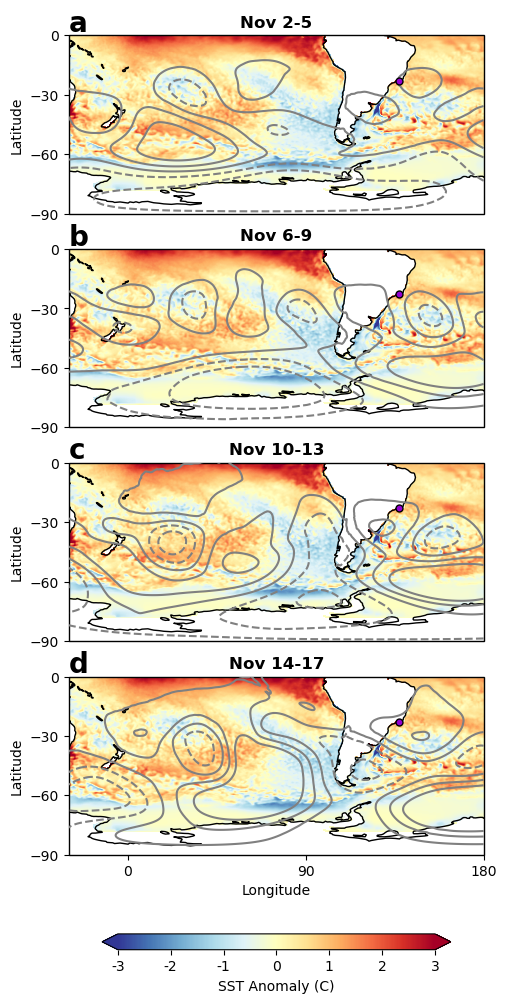

In [19]:
# Plot evolution
import string

fig, axs = plt.subplots(4,1,figsize = (6,14), facecolor = 'w', edgecolor = 'k', subplot_kw = {'projection': ccrs.PlateCarree(central_longitude = 180)}, dpi = 100)
titles = ['Nov 2-5','Nov 6-9','Nov 10-13','Nov 14-17']
levels = np.arange(-75,75 + 25,25)
z200_levels = np.arange(-200,200+100,100)
g = 9.81

for i, ax in enumerate(fig.axes):
    
    #SSTs_toplot = SST_dry.isel(time = slice(4*i,4*(i+1)-1)).mean(dim = 'time')
    SSTs_toplot = SST_dry
    z200_toplot = z200_dry.isel(time = slice(4*i,4*(i+1)-1)).mean(dim = 'time')
    
    ax.set_ylabel('Latitude')
    ax.set_yticks([-90,-60,-30,0])

    # Plot subplot
    mesh = ax.pcolormesh(SSTs_toplot.lon + 180, SSTs_toplot.lat, SSTs_toplot.anom, vmin = -3, vmax = 3, cmap = 'RdYlBu_r')

    ax.coastlines(linewidth=1)
    ax.set_xticks([-30,0,90,180])
    ax.set_yticks([-90,-60,-30,0]);
    ax.set_title(titles[i], fontweight = 'bold')
    ax.set_xlim([-30,180])
    ax.set_ylim([-90,0])

    if i == 3:
        ax.set_xlabel('Longitude')
        ax.set_xticks([-180,-90,0,90,180])
        ax.set_xlim([-30,180])
        ax.set_ylim([-90,0])
    else:
        ax.set_xticks([])

    # Add contours on top for geopotential height anomalies
    contour = ax.contour(z200_toplot.longitude+180, z200_toplot.latitude, z200_toplot/g, levels = z200_levels, colors = 'grey', zorder = 3)

    # Add Rio location
    rio = ax.scatter(galeao.longitude + 180, galeao.latitude, marker = 'o', s = 25, color = 'darkviolet', edgecolor = 'k', zorder = 10)

    # Add label to each subplot
    ax.text(-30, 2, string.ascii_lowercase[i], size=20, weight='bold')
    
cbar = plt.colorbar(mesh, ax=axs.ravel(), format = '%1d', orientation='horizontal', label = 'SST Anomaly (C)', extend = 'both', pad = 0.075, shrink = 0.75)

#plt.savefig('/home/ivanov/jupyternb/Brazil_Heatwave/Final Figures for Upload/Figure6.png')

plt.show()

# Figure S7

In [23]:
z200_mag_dry = z200_mag_evol.sel(time = slice('2023-11-02','2023-11-17'))

In [24]:
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """
    Truncate a colormap to a specific range of values.
    """
    new_cmap = LinearSegmentedColormap.from_list(
        'truncated', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Define the range of values to truncate
min_value = 0.5
max_value = 1.0

# Truncate the colormap
SST_cmap = truncate_colormap(plt.get_cmap('RdYlBu_r'), min_value, max_value)

/opt/sw/anaconda3/2023.09/envs/pangeoxtd36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/opt/sw/anaconda3/2023.09/envs/pangeoxtd36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1459: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = self._pcolormesh_patched(*args, **kwargs)
/opt/sw/anaconda3/2023.09/envs/pangeoxtd36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is depr

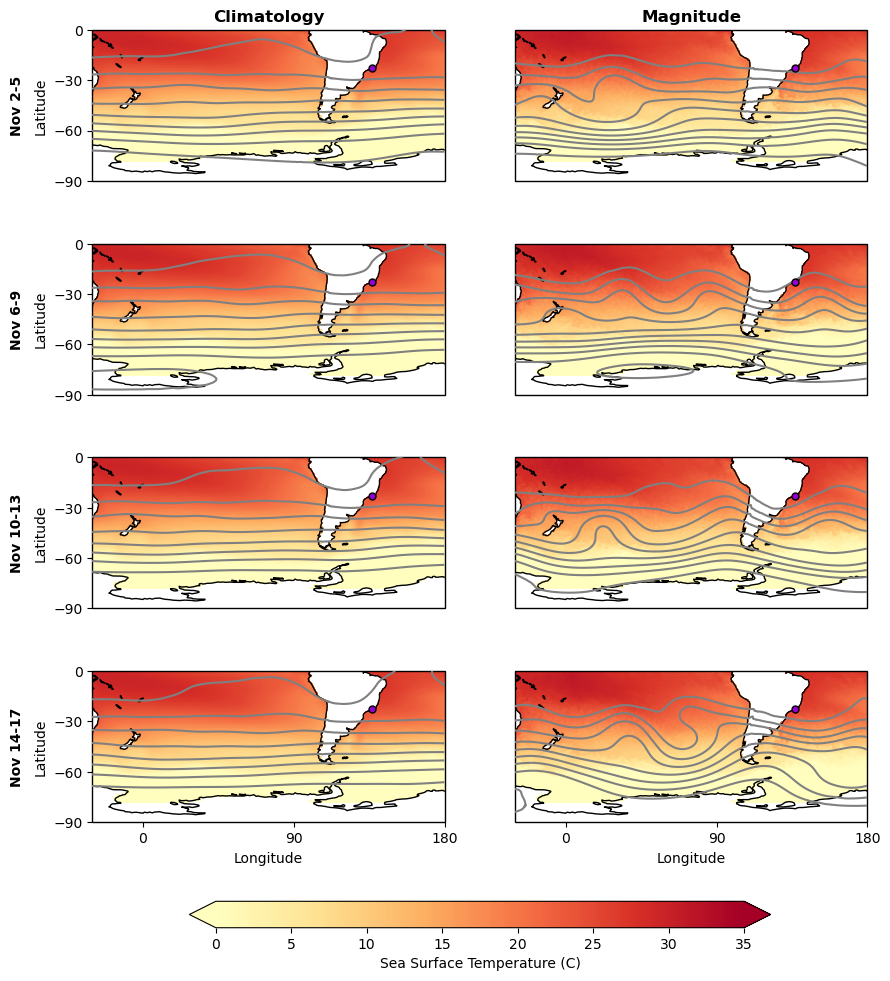

In [25]:
# Plot these two together

# Plot climatology
fig, axs = plt.subplots(4,2,figsize = (10,14), facecolor = 'w', edgecolor = 'k', subplot_kw = {'projection': ccrs.PlateCarree(central_longitude = 180)}, dpi = 100)
titles = ['Nov 2-5','Nov 6-9','Nov 10-13','Nov 14-17']
levels = np.arange(-75,75 + 25,25)
z200_levels = np.arange(10000,12500,200)
g = 9.81

for i, ax in enumerate(fig.axes):
    
    if (i % 2) == 0:
        SSTs_toplot = SSTs_surrounding.isel(time = slice(4*int(i/2),4*(int(i/2)+1)-1)).mean(dim = 'time')
        z200_toplot = z200_mag_dry.isel(time = slice(4*int(i/2),4*(int(i/2)+1)-1)).mean(dim = 'time') - z200_dry.isel(time = slice(4*int(i/2),4*(int(i/2)+1)-1)).mean(dim = 'time')

        ax.set_ylabel('Latitude')
        ax.set_yticks([-90,-60,-30,0])

        # Plot subplot
        mesh = ax.pcolormesh(SSTs_toplot.lon + 180, SSTs_toplot.lat, SSTs_toplot.sst - SSTs_toplot.anom, vmin = 0, vmax = 35, cmap = SST_cmap)

        ax.coastlines(linewidth=1)
        ax.set_xticks([-30,0,90,180])
        ax.set_yticks([-90,-60,-30,0])
        ax.set_xlim([-30,180])
        ax.set_ylim([-90,0])

        if i == 6:
            ax.set_xlabel('Longitude')
            ax.set_xticks([-180,-90,0,90,180])
            ax.set_xlim([-30,180])
            ax.set_ylim([-90,0])
        else:
            ax.set_xticks([])

        # Add contours on top for geopotential height anomalies
        contour = ax.contour(z200_toplot.longitude+180, z200_toplot.latitude, z200_toplot.z/g, levels = z200_levels, colors = 'grey', zorder = 3)

        # Add Rio location
        rio = ax.scatter(galeao.longitude + 180, galeao.latitude, marker = 'o', s = 25, color = 'darkviolet', edgecolor = 'k', zorder = 10)
        
        # Add title to left of plot
        ax.text(-75,-45, titles[int(i/2)], fontweight = 'bold', rotation = 90, horizontalalignment = 'center',verticalalignment = 'center')
        
    if (i % 2) != 0:
        
        SSTs_toplot = SSTs_surrounding.isel(time = slice(4*int((i-1)/2),4*(int((i-1)/2)+1)-1)).mean(dim = 'time')
        z200_toplot = z200_mag_dry.isel(time = slice(4*int((i-1)/2),4*(int((i-1)/2)+1)-1)).mean(dim = 'time')

        ax.set_ylabel('')
        ax.set_yticks([-90,-60,-30,0])

        # Plot subplot
        mesh = ax.pcolormesh(SSTs_toplot.lon + 180, SSTs_toplot.lat, SSTs_toplot.sst, vmin = 0, vmax = 35, cmap = SST_cmap)

        ax.coastlines(linewidth=1)
        ax.set_xticks([-30,0,90,180])
        ax.set_yticks([])
        #ax.set_title(titles[i], fontweight = 'bold')
        ax.set_xlim([-30,180])
        ax.set_ylim([-90,0])

        if i == 7:
            ax.set_xlabel('Longitude')
            ax.set_xticks([-180,-90,0,90,180])
            ax.set_xlim([-30,180])
            ax.set_ylim([-90,0])
        else:
            ax.set_xticks([])

        # Add contours on top for geopotential height anomalies
        contour = ax.contour(z200_toplot.longitude+180, z200_toplot.latitude, z200_toplot.z/g, levels = z200_levels, colors = 'grey', zorder = 3)

        # Add Rio location
        rio = ax.scatter(galeao.longitude + 180, galeao.latitude, marker = 'o', s = 25, color = 'darkviolet', edgecolor = 'k', zorder = 10)

    if i == 0:
        ax.set_title('Climatology', fontweight = 'bold')
        
    if i == 1:
        ax.set_title('Magnitude', fontweight = 'bold')
        
cbar = plt.colorbar(mesh, ax=axs.ravel(), format = '%1d', orientation='horizontal', label = 'Sea Surface Temperature (C)', extend = 'both', pad = 0.075, shrink = 0.75)

#plt.savefig('figureS3_200hPa.png')